In [1]:
from pyforest import*
lazy_imports()

['import lightgbm as lgb',
 'from pathlib import Path',
 'import sys',
 'from sklearn.ensemble import RandomForestRegressor',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'from sklearn.model_selection import GridSearchCV',
 'from sklearn.preprocessing import PolynomialFeatures',
 'import pydot',
 'import xgboost as xgb',
 'import matplotlib.pyplot as plt',
 'import statistics',
 'import tensorflow as tf',
 'import keras',
 'from sklearn.manifold import TSNE',
 'from sklearn.preprocessing import StandardScaler',
 'import numpy as np',
 'from xlrd import open_workbook',
 'from sklearn.linear_model import RidgeCV',
 'import plotly.express as px',
 'from scipy import stats',
 'import fbprophet',
 'from sklearn.ensemble import RandomForestClassifier',
 'import altair as alt',
 'from sklearn.preprocessing import LabelEncoder',
 'import pickle',
 'from

In [2]:
df = pd.read_csv('pima-indians-diabetes.csv')

<IPython.core.display.Javascript object>

In [3]:
df

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.shape

(768, 9)

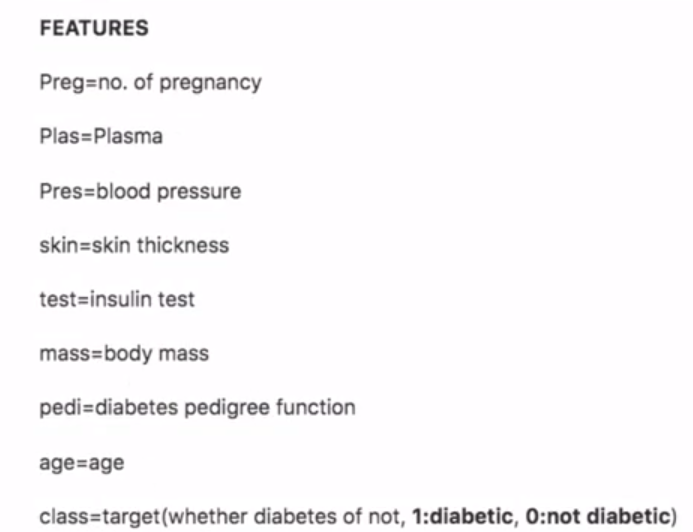

### check for any null values

In [5]:
df.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [6]:
df.isnull().sum().any()

False

In [7]:
# if you see in test & skin column there is 0 which mean no data available but python consider it as int
# so here you have to use your own intitution 

In [8]:
# visualising the data
col = list(df)[0:-1]       # list of first 8 columns     in slicing last column is not selectable

array([[<AxesSubplot:title={'center':'Preg'}>,
        <AxesSubplot:title={'center':'Plas'}>,
        <AxesSubplot:title={'center':'Pres'}>],
       [<AxesSubplot:title={'center':'skin'}>,
        <AxesSubplot:title={'center':'test'}>,
        <AxesSubplot:title={'center':'mass'}>],
       [<AxesSubplot:title={'center':'pedi'}>,
        <AxesSubplot:title={'center':'age'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot

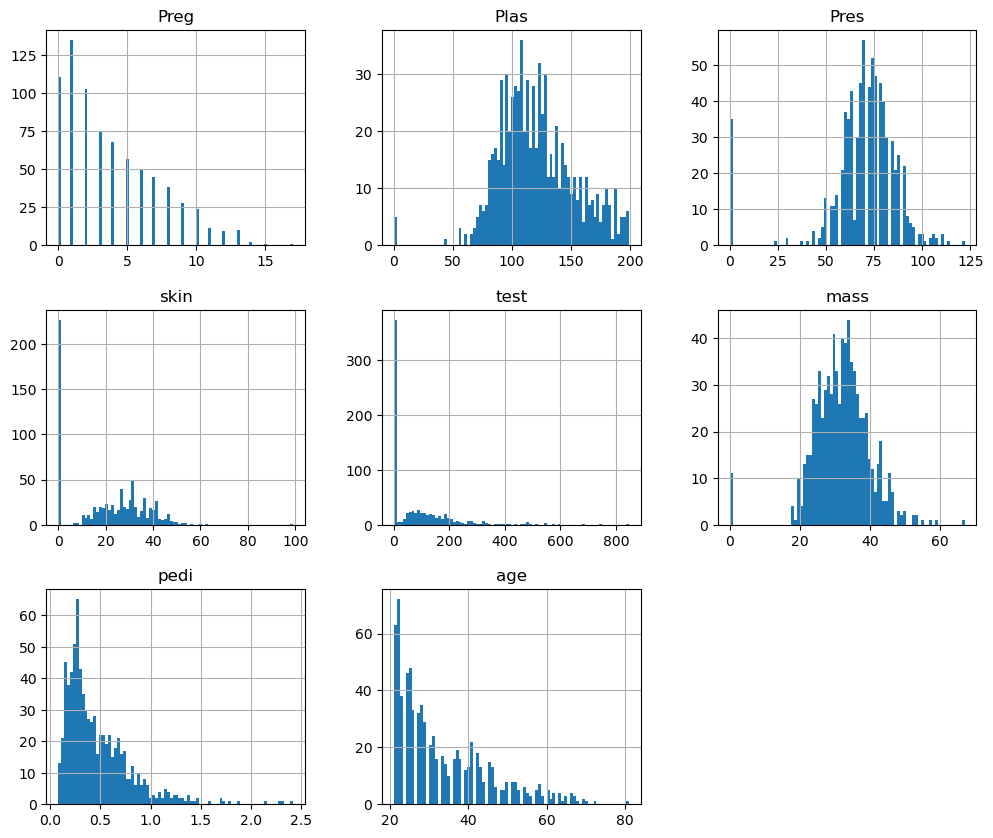

In [9]:
df[col].hist(bins=80,figsize = (12,50),layout=(14,3))

In [10]:
# if you see in in test & skin 0 is @ high and it is not good

## Identify Correlation in data

In [11]:
df.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

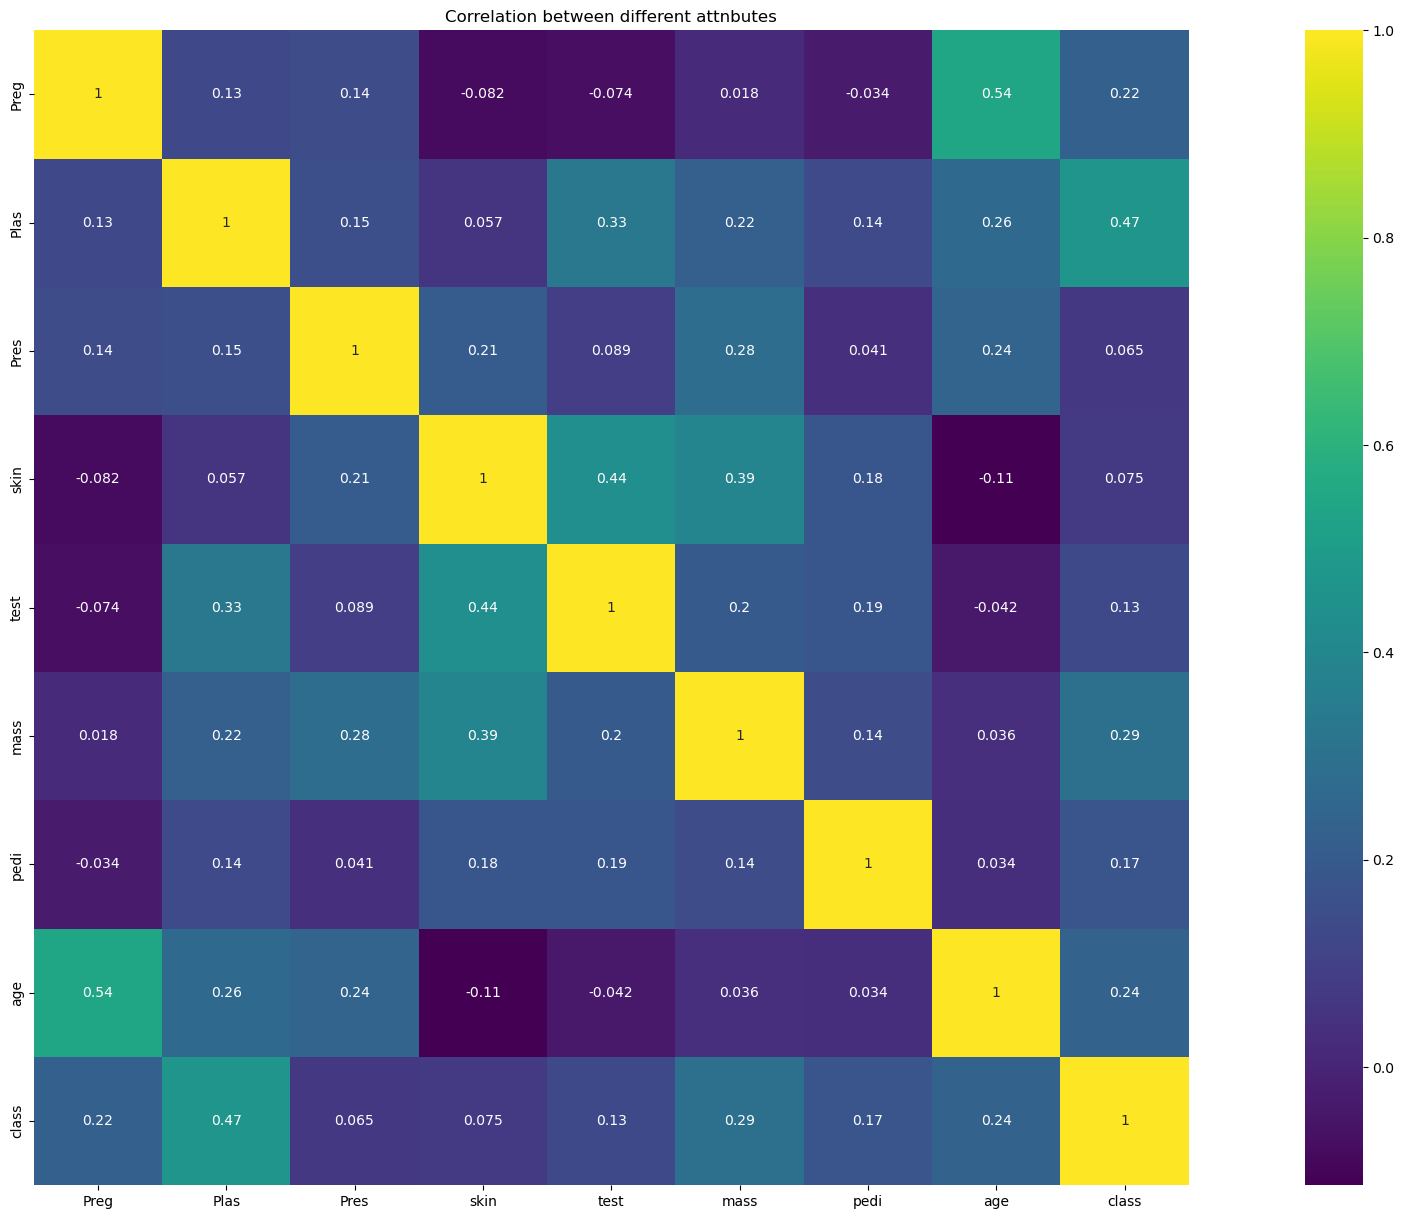

In [12]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),annot =True,square=True,vmax=1,cmap='viridis')
plt.title('Correlation between different attnbutes')
plt.show()

<IPython.core.display.Javascript object>

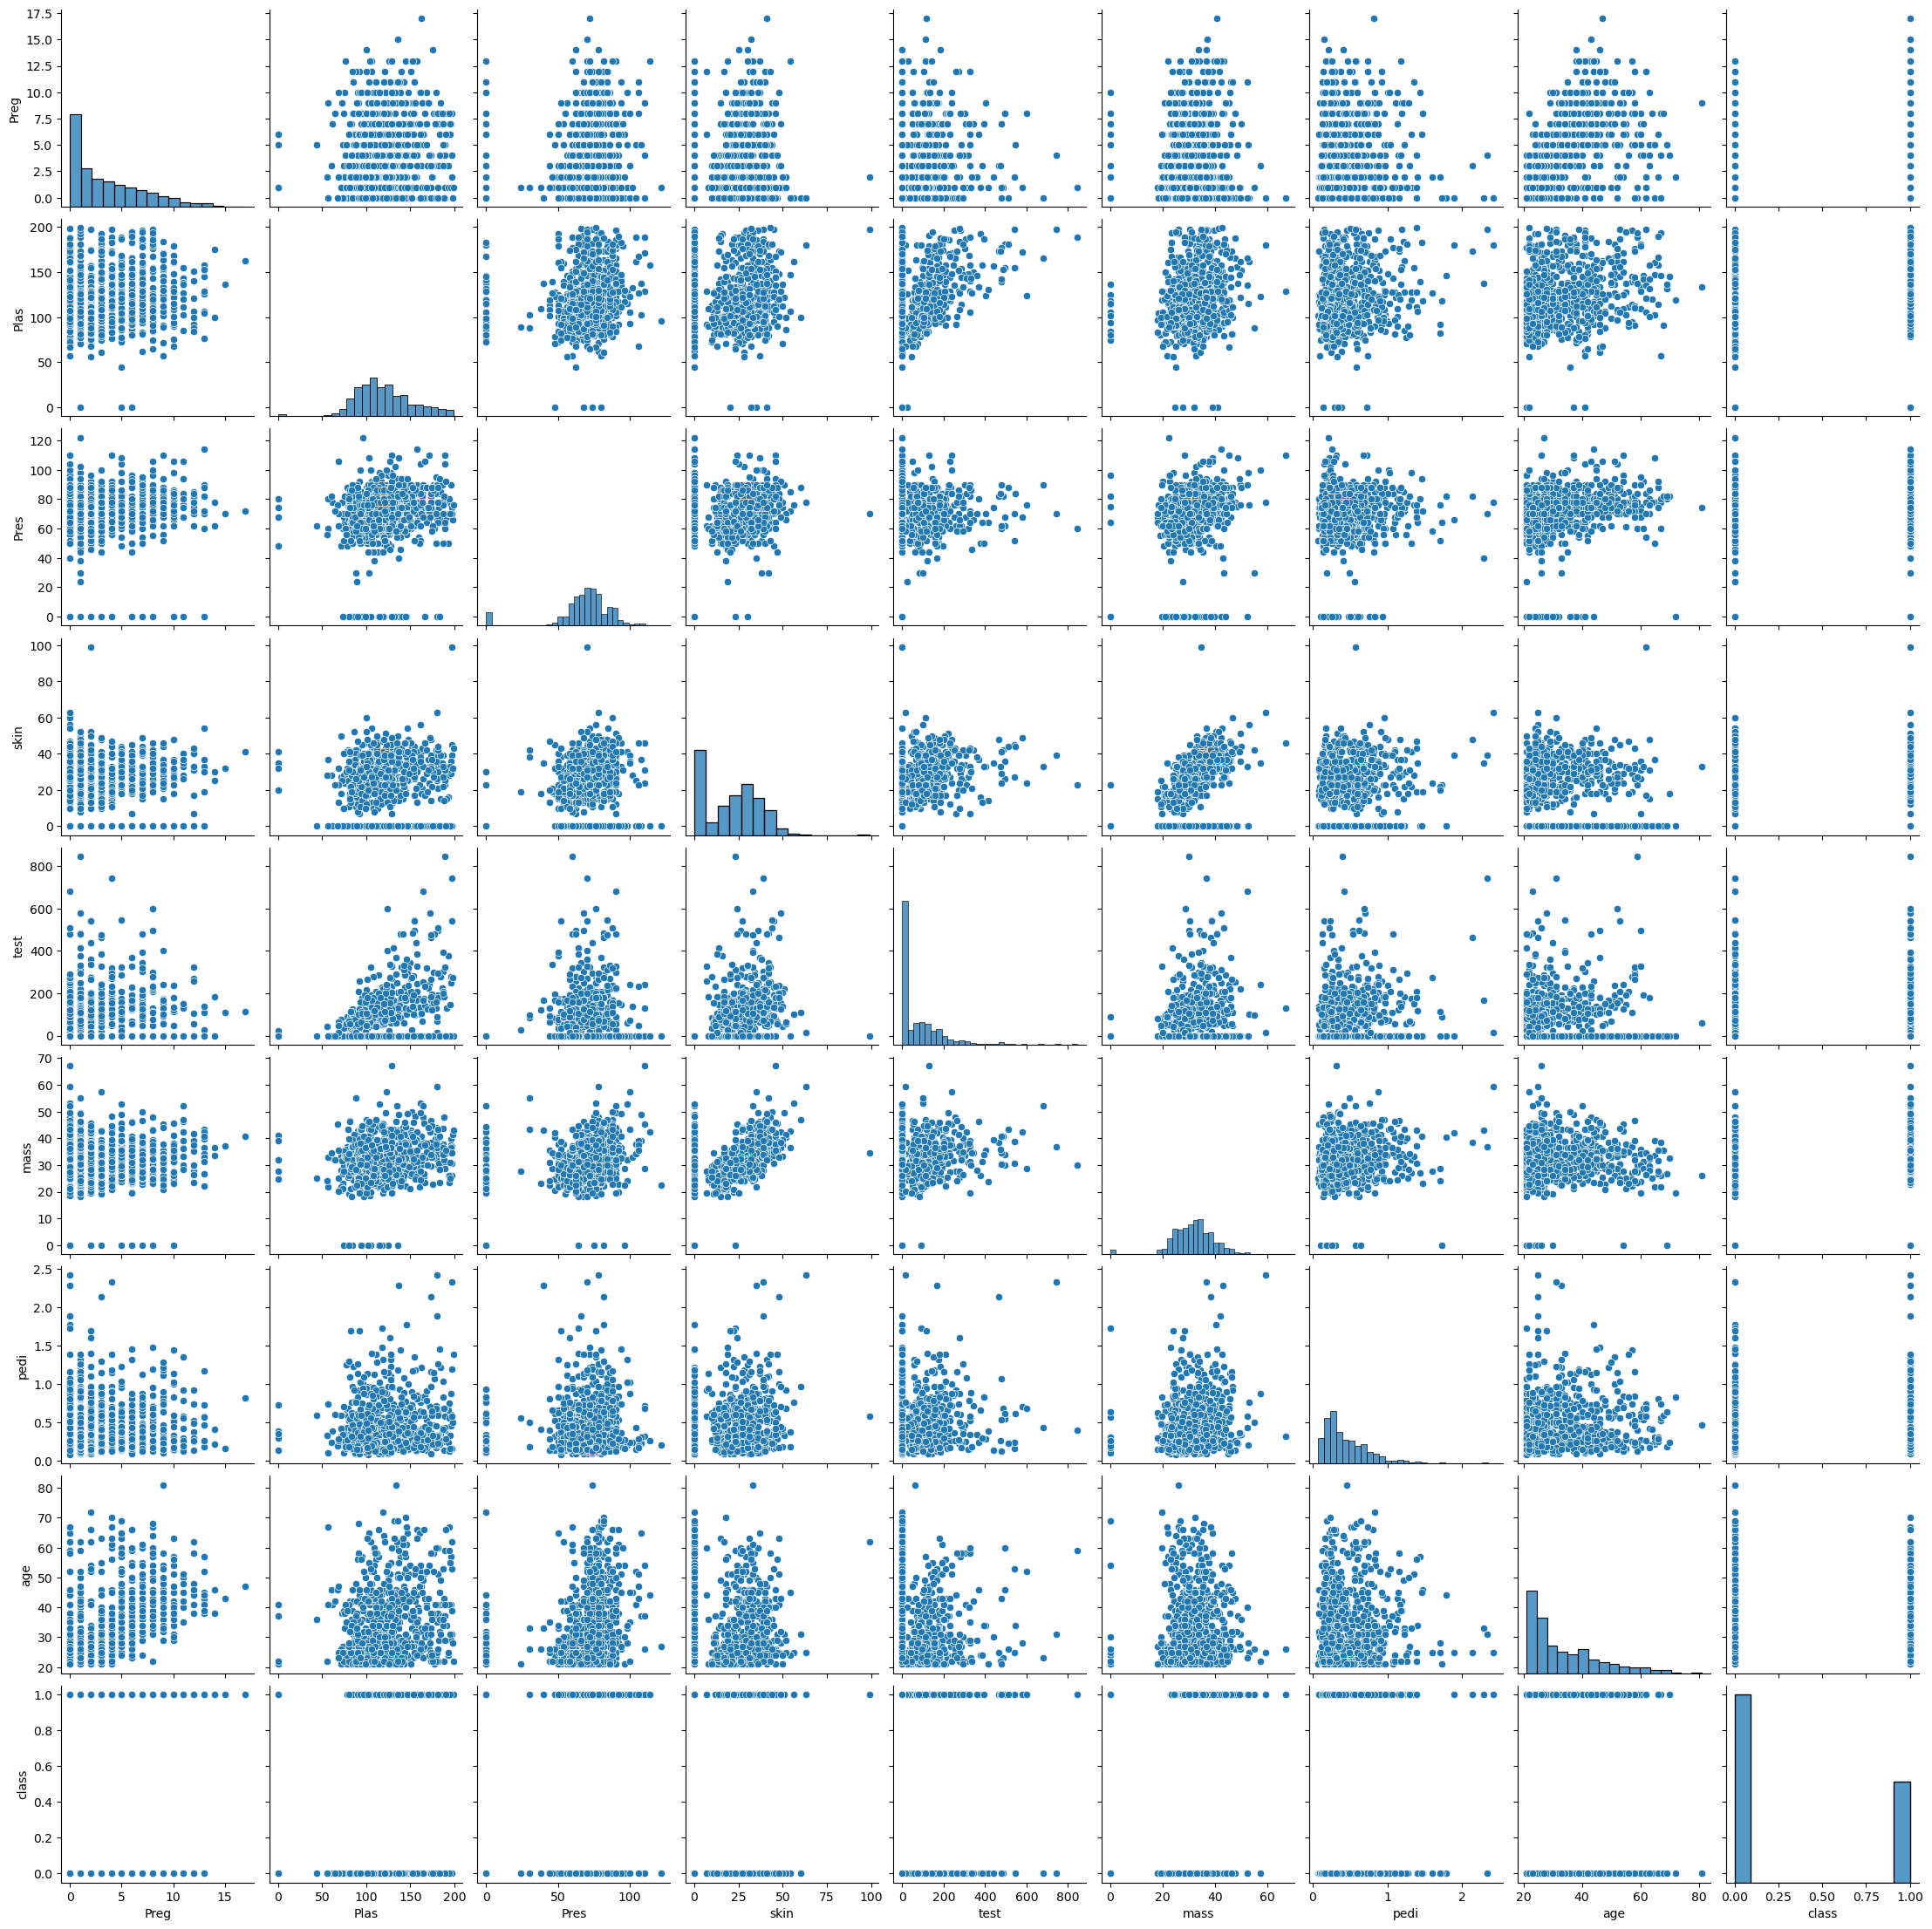

In [93]:
sns.pairplot(df)

In [14]:
#sns.pairplot(df,diag_kind='kde')

## Calculate diabetes ratio of True/False from outcome variable

In [15]:
# if you see in data set last column class 0 means no diabetes    &   1 means diabets 
# but python does not understand this            so

df['class'].value_counts()
                   # as you can see here our data is in imbalance state     & we will deal with dataumbalance in future

0    500
1    268
Name: class, dtype: int64

So we have 34.90% people in current data set who have diabetes and rest of 65.10% doesn't have diabetes.

In [16]:
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Spliting the data

We will use 70% of data for training and 30% for testing.

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop('class',axis=1)
Y = df['class']

In [19]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [20]:
x_train

,Preg,Plas,Pres,skin,test,mass,pedi,age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29
...,...,...,...,...,...,...,...,...
645,2,157,74,35,440,39.4,0.134,30
715,7,187,50,33,392,33.9,0.826,34
72,13,126,90,0,0,43.4,0.583,42
235,4,171,72,0,0,43.6,0.479,26


In [21]:
x_test

,Preg,Plas,Pres,skin,test,mass,pedi,age
285,7,136,74,26,135,26.0,0.647,51
101,1,151,60,0,0,26.1,0.179,22
581,6,109,60,27,0,25.0,0.206,27
352,3,61,82,28,0,34.4,0.243,46
726,1,116,78,29,180,36.1,0.496,25
...,...,...,...,...,...,...,...,...
241,4,91,70,32,88,33.1,0.446,22
599,1,109,38,18,120,23.1,0.407,26
650,1,91,54,25,100,25.2,0.234,23
11,10,168,74,0,0,38.0,0.537,34


In [22]:
y_train

88     1
467    0
550    0
147    0
481    0
      ..
645    0
715    1
72     1
235    1
37     1
Name: class, Length: 537, dtype: int64

In [23]:
y_test

285    0
101    0
581    0
352    0
726    0
      ..
241    0
599    0
650    0
11     1
214    1
Name: class, Length: 231, dtype: int64

In [24]:
print('{}% is the training set'.format((len(x_train)/len(df))*100))
print('{}% is the test set'.format((len(x_test)/len(df))*100))

69.921875% is the training set
30.078125% is the test set


# Data Preparation

### check for missing or hidden vakues

In [25]:
x_train.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29
412,1,143,84,23,310,42.4,1.076,22
248,9,124,70,33,402,35.4,0.282,34
642,6,147,80,0,0,29.5,0.178,50
519,6,129,90,7,326,19.6,0.582,60
730,3,130,78,23,79,28.4,0.323,34


In [26]:
x_test.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
285,7,136,74,26,135,26.0,0.647,51
101,1,151,60,0,0,26.1,0.179,22
581,6,109,60,27,0,25.0,0.206,27
352,3,61,82,28,0,34.4,0.243,46
726,1,116,78,29,180,36.1,0.496,25


we can see a lot of 0 (zeros)

#### let's replace zeros with mean

In [27]:
from sklearn.impute import SimpleImputer

replace = SimpleImputer(missing_values = 0 , strategy = 'mean')

cols = x_train.columns

x_train = pd.DataFrame(replace.fit_transform(x_train))
x_test = pd.DataFrame(replace.fit_transform(x_test))

x_train.columns = cols
x_test.columns = cols

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
x_train.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,15.000000,136.0,70.0,32.000000,110.000000,37.1,0.153,43.0
1,4.396514,97.0,64.0,36.000000,100.000000,36.8,0.600,25.0
2,1.000000,116.0,70.0,28.000000,158.243346,27.4,0.204,21.0
3,2.000000,106.0,64.0,35.000000,119.000000,30.5,1.400,34.0
4,4.396514,123.0,88.0,37.000000,158.243346,35.2,0.197,29.0
5,1.000000,143.0,84.0,23.000000,310.000000,42.4,1.076,22.0
6,9.000000,124.0,70.0,33.000000,402.000000,35.4,0.282,34.0
7,6.000000,147.0,80.0,28.672131,158.243346,29.5,0.178,50.0
8,6.000000,129.0,90.0,7.000000,326.000000,19.6,0.582,60.0
9,3.000000,130.0,78.0,23.000000,79.000000,28.4,0.323,34.0


In [29]:
x_test.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,7.000000,136.0,74.0,26.00,135.000000,26.0,0.647,51.0
1,1.000000,151.0,60.0,30.16,150.137405,26.1,0.179,22.0
2,6.000000,109.0,60.0,27.00,150.137405,25.0,0.206,27.0
3,3.000000,61.0,82.0,28.00,150.137405,34.4,0.243,46.0
4,1.000000,116.0,78.0,29.00,180.000000,36.1,0.496,25.0
5,4.722222,119.0,66.0,27.00,150.137405,38.8,0.259,22.0
6,4.000000,122.0,68.0,30.16,150.137405,35.0,0.394,29.0
7,1.000000,119.0,54.0,13.00,50.000000,22.3,0.205,24.0
8,1.000000,97.0,70.0,40.00,150.137405,38.1,0.218,30.0
9,4.722222,105.0,64.0,41.00,142.000000,41.5,0.173,22.0


In [30]:
len(x_train)

537

In [31]:
len(x_test)

231

# Logistic Regression Model

In [32]:
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

In [42]:
# building the model

model = LogisticRegression(solver='liblinear')
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [43]:
# ok model is builded now let us introduce          test data to it

y_predict = model.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [44]:
model_score = model.score(x_test,y_test)

In [45]:
print(model_score)                      # 0.7792207792207793       is not bad for this small data set

0.7792207792207793


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

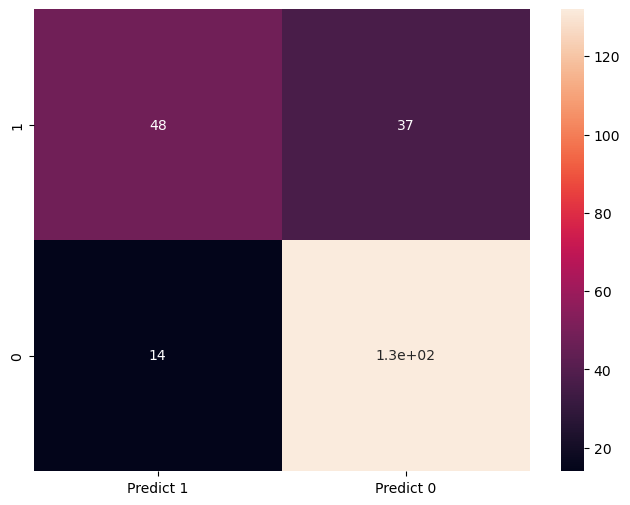

In [46]:
# now let us see which are getting both good & wrong prediction @ a time

cm = metrics.confusion_matrix(y_test,y_predict,labels=[1,0])

df_cm = pd.DataFrame(cm,index = [i for i in ['1','0']], columns = [ i for i in ['Predict 1','Predict 0']])

plt.figure(figsize=(8,6))
sns.heatmap(df_cm,annot=True)

here both 37 & 14 are false, negative pridiction  actually causes problem in production , so in future we will try to limit those things

# Building Our Naive Bayes algorithm

In [40]:
from sklearn.naive_bayes import GaussianNB     # using Gaussian algorithm from Naive Bayes

model_ =  GaussianNB ()

In [41]:
model_.fit(x_train,y_train)        # building the model

GaussianNB()

### Performance of our model with training data

In [50]:
x_train.head(7)

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,15.000000,136.0,70.0,32.0,110.000000,37.1,0.153,43.0
1,4.396514,97.0,64.0,36.0,100.000000,36.8,0.600,25.0
2,1.000000,116.0,70.0,28.0,158.243346,27.4,0.204,21.0
3,2.000000,106.0,64.0,35.0,119.000000,30.5,1.400,34.0
4,4.396514,123.0,88.0,37.0,158.243346,35.2,0.197,29.0
5,1.000000,143.0,84.0,23.0,310.000000,42.4,1.076,22.0
6,9.000000,124.0,70.0,33.0,402.000000,35.4,0.282,34.0


In [51]:
train_prediction = model_.predict(x_train)
train_prediction

# here if your model perform well with trainig data but poorly with test data then it is known as    overfit 


# here with given 8 columns our model predicting if a person will have daibetes or not

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [52]:
from sklearn import metrics

In [53]:
metrics.accuracy_score(y_train,train_prediction)

0.7392923649906891

In [64]:
print('model accuracy on train data is :{0:0.4f}'.format(metrics.accuracy_score(y_train,train_prediction)))

# here we checking score with original zeros from class column & predicted zeros of model

model accuracy on train data is :0.7393


### Performance of our mogel with testing data

In [65]:
x_test.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,7.0,136.0,74.0,26.00,135.000000,26.0,0.647,51.0
1,1.0,151.0,60.0,30.16,150.137405,26.1,0.179,22.0
2,6.0,109.0,60.0,27.00,150.137405,25.0,0.206,27.0
3,3.0,61.0,82.0,28.00,150.137405,34.4,0.243,46.0
4,1.0,116.0,78.0,29.00,180.000000,36.1,0.496,25.0


In [66]:
test_prediction = model_.predict(x_test)
test_prediction


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [69]:
 # check for model accuracy
    
print('model accuracy on test data is :{0:0.4f}'.format(metrics.accuracy_score(y_test,test_prediction)))

model accuracy on test data is :0.7706


if you see our score in training data is 0.74 & for test data it is 0.77 , so this kind of fit is underfit

## Lets check the confusion matrix and classification report

In [85]:
cm = metrics.confusion_matrix(y_test,test_prediction,labels=[1,0])

df_cm = pd.DataFrame(cm,index=[i for i in ['1','0']],columns = [i for i in ['predict 1','predict 0 ']])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

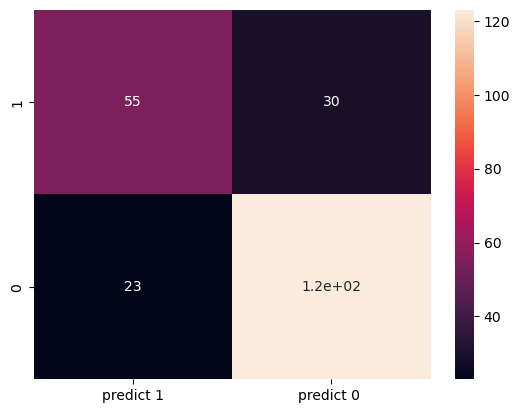

In [86]:

sns.heatmap(df_cm,annot=True)

we correctly prdict 55 '1' i.e.. 55 patience with diabetes

30 of '1's pedicted wrongly as '0's

## let us Classify our report

In [87]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [90]:
print('Classification Score')

print(metrics.classification_report(y_test,test_prediction,labels=[1,0]))

#here We can see our true positive numbers with value 1 is of precision and recall is below 70%

Classification Score
              precision    recall  f1-score   support

           1       0.71      0.65      0.67        85
           0       0.80      0.84      0.82       146

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



here in precision we got 0.71 or 71% '1's which tell about 55 true '1's we got in heatmap as well as 0.80 or 80% are true '0's

support shows us total number of data available in the given condition

recall tells about how many data values can be remember by our model for future usage

f1 score combines the precision and recall scores of a model and gives average value of them